In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

from pathlib import Path

In [18]:
entries_df = pd.read_csv(Path("../data/entries2.csv"))
entries_df["date"] = pd.to_datetime(entries_df["date"])
entries_df.loc[(entries_df['date'] > '2014-07-31') & (entries_df['date'] < '2017-06-01'), "city_name"] = "Champaign"
entries_df.loc[(entries_df['date'] < '2014-08-01'), "city_name"] = "Chicago"
entries_df.loc[(entries_df['date'] >= '2017-06-01') & (entries_df['date'] < '2020-01-01') & entries_df['city_name'].isna(), "city_name"] = "San Francisco"

weather_df = pd.read_csv(Path("../data/weather.csv"))
weather_df["date"] = pd.to_datetime(weather_df["date"])

In [19]:
entries_df.head()

,id,_hash,uuid,date,emotion,context,sentiment,sentiment_score,city_name
0,20120804053731,7e94b8882e5c9c731b703efd17fd6cae,2031417A85A7497591746749EA445757,2012-08-04 05:37:31,fear,angry|devastated|excited|proud,NEGATIVE,0.949958,Chicago
1,20120805033926,26de79ceb5312d7766a29f9d71e2850e,0C46A121B5A746D7981F412858FE3F4E,2012-08-05 03:39:26,fear,angry|anticipating|trusting|anxious|joyful,NEGATIVE,0.933307,Chicago
2,20120805180010,da5dbe3810084cdc93451bc4d8d39de1,DA284A7F3ABE46DA9BBA7D1BE3E8147E,2012-08-05 18:00:10,joy,angry|disgusted,POSITIVE,0.969270,Chicago
3,20120810180001,e5c57f8675256bed9cef0ff800a30ed7,1F9040107E1B42339FD0E7928DE98C39,2012-08-10 18:00:01,neutral,angry|devastated,POSITIVE,0.973275,Chicago
4,20120812211044,37bb3374881a12fb7d568f98a455bd96,3E541DD7F6204876BA964DDA3411C613,2012-08-12 21:10:44,neutral,angry|apprehensive|anticipating|excited|terrif...,NEGATIVE,0.983425,Chicago


In [20]:
weather_df.head()

,Unnamed: 0,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,...,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,date
0,0,1293840000,2011-01-01 00:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,13.07,10000.0,11.97,...,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n,2011-01-01 00:00:00
1,1,1293843600,2011-01-01 01:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,9.54,10000.0,8.47,...,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n,2011-01-01 01:00:00
2,2,1293847200,2011-01-01 02:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,9.50,10000.0,8.43,...,0.20,NaN,NaN,NaN,90,500,Rain,light rain,10n,2011-01-01 02:00:00
3,3,1293850800,2011-01-01 03:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,8.80,10000.0,7.09,...,0.12,NaN,NaN,NaN,90,500,Rain,light rain,10n,2011-01-01 03:00:00
4,4,1293854400,2011-01-01 04:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,8.94,10000.0,6.73,...,NaN,NaN,NaN,NaN,90,500,Rain,light rain,10n,2011-01-01 04:00:00


In [22]:
def find_weather(date, city_name, key):
    return weather_df.loc[(weather_df["date"] >= date) & (weather_df["date"] < date + pd.DateOffset(hours=1)) & (weather_df["city_name"] == city_name), key][:1]


def get_weather(date, city_name, key):
    result = find_weather(date, city_name, key)
    if result.empty:
        return
    return result.iloc[0]

In [23]:
entries_df["clouds_all"] = entries_df.apply(lambda e: get_weather(e.date, e.city_name, "clouds_all"), axis=1)
entries_df.head()

,id,_hash,uuid,date,emotion,context,sentiment,sentiment_score,city_name,clouds_all
0,20120804053731,7e94b8882e5c9c731b703efd17fd6cae,2031417A85A7497591746749EA445757,2012-08-04 05:37:31,fear,angry|devastated|excited|proud,NEGATIVE,0.949958,Chicago,1.0
1,20120805033926,26de79ceb5312d7766a29f9d71e2850e,0C46A121B5A746D7981F412858FE3F4E,2012-08-05 03:39:26,fear,angry|anticipating|trusting|anxious|joyful,NEGATIVE,0.933307,Chicago,40.0
2,20120805180010,da5dbe3810084cdc93451bc4d8d39de1,DA284A7F3ABE46DA9BBA7D1BE3E8147E,2012-08-05 18:00:10,joy,angry|disgusted,POSITIVE,0.969270,Chicago,40.0
3,20120810180001,e5c57f8675256bed9cef0ff800a30ed7,1F9040107E1B42339FD0E7928DE98C39,2012-08-10 18:00:01,neutral,angry|devastated,POSITIVE,0.973275,Chicago,75.0
4,20120812211044,37bb3374881a12fb7d568f98a455bd96,3E541DD7F6204876BA964DDA3411C613,2012-08-12 21:10:44,neutral,angry|apprehensive|anticipating|excited|terrif...,NEGATIVE,0.983425,Chicago,75.0


In [315]:
analysis_df["weather_description"] = analysis_df.apply(lambda e: get_weather(e.date, e.city_name, "weather_description"), axis=1)

In [316]:
analysis_df

,emotion,sentiment,context,date,city_name,weather_main,clouds_all,weather_description
0,surprise,NEGATIVE,"[ashamed, sentimental]",2014-06-19 12:02:55,Chicago,Mist,90.0,mist
1,fear,NEGATIVE,"[apprehensive, sad]",2013-01-03 04:00:56,Chicago,Clouds,40.0,scattered clouds
2,sadness,POSITIVE,"[anticipating, grateful]",2014-07-23 22:05:00,Chicago,Clouds,20.0,few clouds
3,joy,POSITIVE,"[grateful, sad]",2012-12-14 04:47:36,Chicago,Clouds,90.0,overcast clouds
4,sadness,POSITIVE,"[confident, excited]",2013-07-09 13:14:23,Chicago,Clouds,75.0,broken clouds
...,...,...,...,...,...,...,...,...
238,fear,POSITIVE,"[confident, sentimental]",2018-07-17 03:02:11,Boston,None,NaN,None
239,joy,NEGATIVE,"[annoyed, sad]",2012-09-02 03:30:39,Chicago,Rain,90.0,light rain
240,joy,NEGATIVE,"[anxious, sentimental]",2012-12-15 07:06:18,Chicago,Clouds,90.0,overcast clouds
241,sadness,NEGATIVE,"[apprehensive, terrified]",2013-06-22 14:16:33,Chicago,Clouds,90.0,overcast clouds


In [24]:
entries_df["weather_main"] = entries_df.apply(lambda e: get_weather(e.date, e.city_name, "weather_main"), axis=1)

In [38]:
entries_df["temp"] = entries_df.apply(lambda e: get_weather(e.date, e.city_name, "temp"), axis=1)

In [39]:
entries_df["weather_description"] = entries_df.apply(lambda e: get_weather(e.date, e.city_name, "weather_description"), axis=1)

In [40]:
entries_df.head()

,id,_hash,uuid,date,emotion,context,sentiment,sentiment_score,city_name,clouds_all,weather_main,temp,weather_description
0,20120804053731,7e94b8882e5c9c731b703efd17fd6cae,2031417A85A7497591746749EA445757,2012-08-04 05:37:31,fear,angry|devastated|excited|proud,NEGATIVE,0.949958,Chicago,1.0,Clear,26.78,sky is clear
1,20120805033926,26de79ceb5312d7766a29f9d71e2850e,0C46A121B5A746D7981F412858FE3F4E,2012-08-05 03:39:26,fear,angry|anticipating|trusting|anxious|joyful,NEGATIVE,0.933307,Chicago,40.0,Clouds,22.97,scattered clouds
2,20120805180010,da5dbe3810084cdc93451bc4d8d39de1,DA284A7F3ABE46DA9BBA7D1BE3E8147E,2012-08-05 18:00:10,joy,angry|disgusted,POSITIVE,0.969270,Chicago,40.0,Clouds,27.94,scattered clouds
3,20120810180001,e5c57f8675256bed9cef0ff800a30ed7,1F9040107E1B42339FD0E7928DE98C39,2012-08-10 18:00:01,neutral,angry|devastated,POSITIVE,0.973275,Chicago,75.0,Clouds,22.04,broken clouds
4,20120812211044,37bb3374881a12fb7d568f98a455bd96,3E541DD7F6204876BA964DDA3411C613,2012-08-12 21:10:44,neutral,angry|apprehensive|anticipating|excited|terrif...,NEGATIVE,0.983425,Chicago,75.0,Clouds,24.65,broken clouds


In [41]:
entries_df.loc[entries_df["city_name"] == "San Francisco"]

,id,_hash,uuid,date,emotion,context,sentiment,sentiment_score,city_name,clouds_all,weather_main,temp,weather_description
189,20180625053428,3880c117a74dbb50b502d031a421edf8,7AECFE5C41DE471CBF6F1C9717B4120B,2018-06-25 05:34:28,neutral,proud,POSITIVE,0.996326,San Francisco,91.0,Clouds,14.47,overcast clouds
190,20180625053533,b50c251df9b7c0a275c2b4a1f30ac397,AE8DC51CB1A6402CB9E774E9D66FD2F2,2018-06-25 05:35:33,disgust,anxious|sentimental|joyful|terrified|hopeful,NEGATIVE,0.978027,San Francisco,91.0,Clouds,14.47,overcast clouds
191,20180626200649,e703c75fd71064a5c2b5526440792125,169B379A850F416FA6ABBD6EE9B4F8A7,2018-06-26 20:06:49,neutral,guilty,NEGATIVE,0.999589,San Francisco,2.0,Clear,16.48,sky is clear
192,20180629153609,664301a2b98f90df3c6854cbc2060e61,E4B6F3BE590F4DCDB0618F845CBEDCDC,2018-06-29 15:36:09,surprise,trusting,POSITIVE,0.992618,San Francisco,5.0,Clear,15.13,sky is clear
193,20180630074210,a6f1c9b38d49f04d8af30c658dc84629,4696CD3DF2694313BD10B649013B67A5,2018-06-30 07:42:10,sadness,angry|excited|anxious|trusting,NEGATIVE,0.985234,San Francisco,0.0,Clear,15.81,sky is clear
194,20180709031329,e5cc94ccad206677a8ea4c8093d986e5,8F31CF0AC65B4F619BCCB784A765D5E2,2018-07-09 03:13:29,sadness,angry|disgusted|anxious|trusting,NEGATIVE,0.985182,San Francisco,1.0,Clear,16.02,sky is clear
195,20180710154751,a63d7ee271a70aec9b98a0acc3a8ce05,39D2109F966D458B87D94F2BC850B82D,2018-07-10 15:47:51,neutral,sentimental|joyful|angry|annoyed|excited|trusting,NEGATIVE,0.990710,San Francisco,1.0,Clear,17.04,sky is clear
197,20180726204959,df199a16ecbd08ee7ac266eeb1d93955,2A709313630E4BB8A5FD1ABEFF4E57B1,2018-07-26 20:49:59,neutral,angry|terrified|anticipating,NEGATIVE,0.958168,San Francisco,42.0,Clouds,16.82,scattered clouds
198,20180727003323,635bb2fb06e1384f8277a71181aaaa8b,387B7F2681914745AA59FB0F87D61097,2018-07-27 00:33:23,sadness,anxious|apprehensive|devastated|hopeful|angry|...,NEGATIVE,0.988764,San Francisco,34.0,Clouds,15.64,scattered clouds
199,20180729170630,0f2254cf9ae63edc0f770c0af16671e8,2C1AD2EB90274C82A857F91C93BA4158,2018-07-29 17:06:30,neutral,angry|content|terrified|trusting|disgusted,NEGATIVE,0.986294,San Francisco,68.0,Clouds,13.89,broken clouds


In [42]:
weather_df.to_csv("/home/jovyan/work/research/data/weather.csv")
entries_df.to_csv("/home/jovyan/work/research/data/entries_with_weather.csv")

In [88]:
entries_df["weather_main"].value_counts()

Clouds          139
Clear            53
Rain             24
Mist              9
Snow              7
Haze              2
Thunderstorm      1
Name: weather_main, dtype: int64

In [91]:
entries_df["sentiment"].value_counts()

NEGATIVE    148
POSITIVE     95
Name: sentiment, dtype: int64

In [92]:
entries_df.head()

,id,_hash,uuid,date,emotion,context,sentiment,sentiment_score,city_name,clouds_all,weather_main,temp,weather_description,sent
0,20120804053731,7e94b8882e5c9c731b703efd17fd6cae,2031417A85A7497591746749EA445757,2012-08-04 05:37:31,fear,angry|devastated|excited|proud,NEGATIVE,0.949958,Chicago,1.0,Clear,26.78,sky is clear,0.0
1,20120805033926,26de79ceb5312d7766a29f9d71e2850e,0C46A121B5A746D7981F412858FE3F4E,2012-08-05 03:39:26,fear,angry|anticipating|trusting|anxious|joyful,NEGATIVE,0.933307,Chicago,40.0,Clouds,22.97,scattered clouds,0.0
2,20120805180010,da5dbe3810084cdc93451bc4d8d39de1,DA284A7F3ABE46DA9BBA7D1BE3E8147E,2012-08-05 18:00:10,joy,angry|disgusted,POSITIVE,0.969270,Chicago,40.0,Clouds,27.94,scattered clouds,1.0
3,20120810180001,e5c57f8675256bed9cef0ff800a30ed7,1F9040107E1B42339FD0E7928DE98C39,2012-08-10 18:00:01,neutral,angry|devastated,POSITIVE,0.973275,Chicago,75.0,Clouds,22.04,broken clouds,1.0
4,20120812211044,37bb3374881a12fb7d568f98a455bd96,3E541DD7F6204876BA964DDA3411C613,2012-08-12 21:10:44,neutral,angry|apprehensive|anticipating|excited|terrif...,NEGATIVE,0.983425,Chicago,75.0,Clouds,24.65,broken clouds,0.0


In [120]:
table = pd.crosstab(entries_df["weather_main"], entries_df["weather_description"])
table

weather_description,broken clouds,few clouds,haze,heavy intensity rain,light rain,light rain and snow,light snow,mist,moderate rain,overcast clouds,scattered clouds,sky is clear,thunderstorm with light rain
weather_main,,,,,,,,,,,,,
Clear,0,0,0,0,0,0,0,0,0,0,0,53,0
Clouds,27,26,0,0,0,0,0,0,0,44,42,0,0
Haze,0,0,2,0,0,0,0,0,0,0,0,0,0
Mist,0,0,0,0,0,0,0,9,0,0,0,0,0
Rain,0,0,0,1,18,0,0,0,5,0,0,0,0
Snow,0,0,0,0,0,1,6,0,0,0,0,0,0
Thunderstorm,0,0,0,0,0,0,0,0,0,0,0,0,1


In [121]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2


def chisquared_test(table, prob=0.95):
    print(table)
    stat, p, dof, expected = chi2_contingency(table)
    print('dof=%d' % dof)
    print(expected)
    # interpret test-statistic
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
    if abs(stat) >= critical:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')
    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

In [122]:
chisquared_test(table)

weather_description  broken clouds  few clouds  haze  heavy intensity rain  \
weather_main                                                                 
Clear                            0           0     0                     0   
Clouds                          27          26     0                     0   
Haze                             0           0     2                     0   
Mist                             0           0     0                     0   
Rain                             0           0     0                     1   
Snow                             0           0     0                     0   
Thunderstorm                     0           0     0                     0   

weather_description  light rain  light rain and snow  light snow  mist  \
weather_main                                                             
Clear                         0                    0           0     0   
Clouds                        0                    0           0     0   
H

In [51]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [52]:
import seaborn as sns
sns.set()

<AxesSubplot:xlabel='sentiment', ylabel='emotion'>

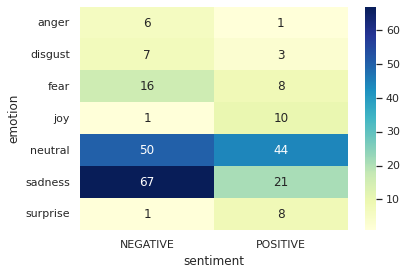

In [53]:
sns.heatmap(table, annot=True, cmap="YlGnBu")

In [55]:
tips = sns.load_dataset("tips")

In [56]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [60]:
entries_df.loc[entries_df["sentiment"] == "POSITIVE", "sent"] = 1

In [61]:
entries_df.loc[entries_df["sentiment"] == "NEGATIVE", "sent"] = 0

<AxesSubplot:xlabel='clouds_all', ylabel='temp'>

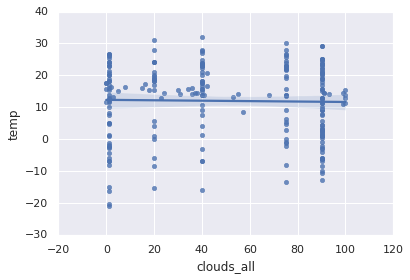

In [68]:
sns.(x="clouds_all", y="temp", data=entries_df)

In [70]:
entries_df

,id,_hash,uuid,date,emotion,context,sentiment,sentiment_score,city_name,clouds_all,weather_main,temp,weather_description,sent
0,20120804053731,7e94b8882e5c9c731b703efd17fd6cae,2031417A85A7497591746749EA445757,2012-08-04 05:37:31,fear,angry|devastated|excited|proud,NEGATIVE,0.949958,Chicago,1.0,Clear,26.78,sky is clear,0.0
1,20120805033926,26de79ceb5312d7766a29f9d71e2850e,0C46A121B5A746D7981F412858FE3F4E,2012-08-05 03:39:26,fear,angry|anticipating|trusting|anxious|joyful,NEGATIVE,0.933307,Chicago,40.0,Clouds,22.97,scattered clouds,0.0
2,20120805180010,da5dbe3810084cdc93451bc4d8d39de1,DA284A7F3ABE46DA9BBA7D1BE3E8147E,2012-08-05 18:00:10,joy,angry|disgusted,POSITIVE,0.969270,Chicago,40.0,Clouds,27.94,scattered clouds,1.0
3,20120810180001,e5c57f8675256bed9cef0ff800a30ed7,1F9040107E1B42339FD0E7928DE98C39,2012-08-10 18:00:01,neutral,angry|devastated,POSITIVE,0.973275,Chicago,75.0,Clouds,22.04,broken clouds,1.0
4,20120812211044,37bb3374881a12fb7d568f98a455bd96,3E541DD7F6204876BA964DDA3411C613,2012-08-12 21:10:44,neutral,angry|apprehensive|anticipating|excited|terrif...,NEGATIVE,0.983425,Chicago,75.0,Clouds,24.65,broken clouds,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,20210718062511,ae1f896aa8999d2c5c3b9543c0e4bf4a,413D6185B13C4BDBA3AE9B8C29237944,2021-07-18 06:25:11,neutral,joyful|terrified,NEGATIVE,0.849702,New York,NaN,None,NaN,None,0.0
239,20210807210947,68b329da9893e34099c7d8ad5cb9c940,4FF15B5F612841D4A533ECF014AAB5ED,2021-08-07 21:09:47,neutral,terrified,POSITIVE,0.748121,NaN,NaN,None,NaN,None,1.0
240,20210828053633,85e53e507fc613478699f21e1e6ebc90,473AB1B87CA84079872520C585AE3904,2021-08-28 05:36:33,anger,proud|excited|angry,NEGATIVE,0.996161,Chicago,20.0,Clouds,27.83,few clouds,0.0
241,20220629001153,2e6f10ed44e23ba91c0f9c36b5b83b09,FD44D72956044DA49B208FE1362DC513,2022-06-29 00:11:53,sadness,content|apprehensive,POSITIVE,0.823476,Teaneck,NaN,None,NaN,None,1.0


In [162]:
entry_filepath = Path("/home/jovyan/work/thoughtlog/20140307151903.DCA366A1D928415CA69C8A06FFAD2575.c5a4bd83538afb90ee7615d69bdddcdd.json")

In [163]:
entry_filepath.exists()

True

In [164]:
import json

with open(entry_filepath, "r") as f:
    data = json.load(f)

In [165]:
data

{'_hash': 'c5a4bd83538afb90ee7615d69bdddcdd',
 'date': '2014-03-07T15:19:03',
 'id': 20140307151903,
 'uuid': 'DCA366A1D928415CA69C8A06FFAD2575',
 'metadata': {'tl_source_dir': '/home/jovyan/work/research/data/Journal/2014',
  'tl_source_file': '2014-03-07_151903.txt'},
 'text': "DATE: 2014-03-07 15:19:03\n\nI'm feeling really low right now, as though I'm being pulled into a violent stream of water. \n\nThis week hasn't been easy. I've had to stay late at a school deploying iPads by myself, my only companions the syncing carts and the MacBooks that accompanied them. \n\nI needed to get all the carts in one place, so I headed to the seventh grade wing on the other side of the building to get the 7th grade carts to the 6th grade wing. \n\nIt was closed when I got there and I lost it. I kicked the doors. I muttered angrily to myself. I dropped F bombs in the team chat room. I was furious. \n\nThen I thought about how close it was to getting to three years. Three years since I tried to off

In [166]:
data.keys()

dict_keys(['_hash', 'date', 'id', 'uuid', 'metadata', 'text', 'analysis'])

In [167]:
analysis = data["analysis"]
stats = analysis["stats"]
labels = analysis["labels"]

In [168]:
paragraphs = labels["paragraphs"]

In [169]:
paragraphs

[{'emotion': [{'label': 'neutral', 'score': 0.8522135615348816}],
  'context': [{'label': 'joyful', 'score': 0.045676544308662415},
   {'label': 'faithful', 'score': 0.04079226031899452},
   {'label': 'excited', 'score': 0.03869829699397087}],
  'text': 'DATE: 2014-03-07 15:19:03',
  'sentiment': [{'label': 'POSITIVE', 'score': 0.9402477145195007}]},
 {'emotion': [{'label': 'sadness', 'score': 0.35896438360214233}],
  'context': [{'label': 'confident', 'score': 0.040857233107089996},
   {'label': 'impressed', 'score': 0.04060980677604675},
   {'label': 'caring', 'score': 0.040316078811883926}],
  'text': "I'm feeling really low right now, as though I'm being pulled into a violent stream of water.",
  'sentiment': [{'label': 'NEGATIVE', 'score': 0.9990023970603943}]},
 {'emotion': [{'label': 'sadness', 'score': 0.5996877551078796}],
  'context': [{'label': 'excited', 'score': 0.0560583770275116},
   {'label': 'jealous', 'score': 0.050457101315259933},
   {'label': 'apprehensive', 'score

In [170]:
p = paragraphs[0]

In [171]:
p

{'emotion': [{'label': 'neutral', 'score': 0.8522135615348816}],
 'context': [{'label': 'joyful', 'score': 0.045676544308662415},
  {'label': 'faithful', 'score': 0.04079226031899452},
  {'label': 'excited', 'score': 0.03869829699397087}],
 'text': 'DATE: 2014-03-07 15:19:03',
 'sentiment': [{'label': 'POSITIVE', 'score': 0.9402477145195007}]}

In [172]:
p["emotion"]

[{'label': 'neutral', 'score': 0.8522135615348816}]

In [173]:
emotions = [p["emotion"][0] for p in paragraphs]

In [174]:
emotions

[{'label': 'neutral', 'score': 0.8522135615348816},
 {'label': 'sadness', 'score': 0.35896438360214233},
 {'label': 'sadness', 'score': 0.5996877551078796},
 {'label': 'neutral', 'score': 0.849059522151947},
 {'label': 'anger', 'score': 0.9850690960884094},
 {'label': 'neutral', 'score': 0.4305630028247833},
 {'label': 'sadness', 'score': 0.8198225498199463},
 {'label': 'neutral', 'score': 0.6278879046440125},
 {'label': 'anger', 'score': 0.35296136140823364},
 {'label': 'fear', 'score': 0.7589311599731445},
 {'label': 'sadness', 'score': 0.9673425555229187},
 {'label': 'neutral', 'score': 0.7197863459587097},
 {'label': 'fear', 'score': 0.46677663922309875},
 {'label': 'neutral', 'score': 0.8830820918083191}]

In [175]:
sorted_emotions = sorted(emotions, key=lambda i: i['score'], reverse=True)

In [148]:
sorted_emotions

[{'label': 'anger', 'score': 0.9850690960884094},
 {'label': 'sadness', 'score': 0.9673425555229187},
 {'label': 'neutral', 'score': 0.8830820918083191},
 {'label': 'neutral', 'score': 0.8522135615348816},
 {'label': 'neutral', 'score': 0.849059522151947},
 {'label': 'sadness', 'score': 0.8198225498199463},
 {'label': 'fear', 'score': 0.7589311599731445},
 {'label': 'neutral', 'score': 0.7197863459587097},
 {'label': 'neutral', 'score': 0.6278879046440125},
 {'label': 'sadness', 'score': 0.5996877551078796},
 {'label': 'fear', 'score': 0.46677663922309875},
 {'label': 'neutral', 'score': 0.4305630028247833},
 {'label': 'sadness', 'score': 0.35896438360214233},
 {'label': 'anger', 'score': 0.35296136140823364}]

In [176]:
sorted_emotions[0]

{'label': 'anger', 'score': 0.9850690960884094}

In [178]:
sorted_emotions

[{'label': 'anger', 'score': 0.9850690960884094},
 {'label': 'sadness', 'score': 0.9673425555229187},
 {'label': 'neutral', 'score': 0.8830820918083191},
 {'label': 'neutral', 'score': 0.8522135615348816},
 {'label': 'neutral', 'score': 0.849059522151947},
 {'label': 'sadness', 'score': 0.8198225498199463},
 {'label': 'fear', 'score': 0.7589311599731445},
 {'label': 'neutral', 'score': 0.7197863459587097},
 {'label': 'neutral', 'score': 0.6278879046440125},
 {'label': 'sadness', 'score': 0.5996877551078796},
 {'label': 'fear', 'score': 0.46677663922309875},
 {'label': 'neutral', 'score': 0.4305630028247833},
 {'label': 'sadness', 'score': 0.35896438360214233},
 {'label': 'anger', 'score': 0.35296136140823364}]

In [179]:
sorted_emotions[0]

{'label': 'anger', 'score': 0.9850690960884094}

In [180]:
from collections import Counter

In [181]:
Counter

collections.Counter

In [184]:
Counter([e["label"] for e in sorted_emotions])

Counter({'anger': 2, 'sadness': 4, 'neutral': 6, 'fear': 2})

In [185]:
print(data["text"])

DATE: 2014-03-07 15:19:03

I'm feeling really low right now, as though I'm being pulled into a violent stream of water. 

This week hasn't been easy. I've had to stay late at a school deploying iPads by myself, my only companions the syncing carts and the MacBooks that accompanied them. 

I needed to get all the carts in one place, so I headed to the seventh grade wing on the other side of the building to get the 7th grade carts to the 6th grade wing. 

It was closed when I got there and I lost it. I kicked the doors. I muttered angrily to myself. I dropped F bombs in the team chat room. I was furious. 

Then I thought about how close it was to getting to three years. Three years since I tried to off myself. That in a few days I would be still alive three years after I tried to die. 

I felt conflicted about it all. I knew that part of me still wished I had succeeded. And that is what's so difficult for me to admit aloud. That I still wish I had died. 

Today's the anniversary. It's ab

In [186]:
text = """The first website I ever built was a virtual apartment, or cyberpartment as I termed it, that I showed off to a handful of my (2) friends. None of this involved JavaScript, of course, because I either hadn't learned it yet or it was unable to achieve what I wanted it to do (Both?). It's been 18 years, so the details of this endeavour are vague, but in essence my little cyberpartment was a collection of HTML pages linked to each other in some manner. Each page was a different room in the virtual apartment, and to enter one, you simply click on a graphic of a door.

On the home page, visitors would be greeted by the image of a door I had clearly made in MS Paint. Clicking on that "opened" the "apartment", or to put it in a much more banal way, brought you to the next page I'd coded up. There was even a window in one of these "rooms". What I put in these "rooms" I can unfortunately no longer remember, but perhaps that is to everyone's benefit (to be spared of my cringiest years).

I was particularly proud of this very basic website because it was being hosted on a web server I set up on our shared family PC running Windows. I configured KF Web Server to serve the pages up to the public because I was 12 or 13 and blissfully unaware of security practices...and I was also probably running afoul of our ISP's terms of service by running a web server.

But none of that mattered to me because I had a web presence at last, and one that impressed my (2) friends."""

In [188]:
print(text)

The first website I ever built was a virtual apartment, or cyberpartment as I termed it, that I showed off to a handful of my (2) friends. None of this involved JavaScript, of course, because I either hadn't learned it yet or it was unable to achieve what I wanted it to do (Both?). It's been 18 years, so the details of this endeavour are vague, but in essence my little cyberpartment was a collection of HTML pages linked to each other in some manner. Each page was a different room in the virtual apartment, and to enter one, you simply click on a graphic of a door.

On the home page, visitors would be greeted by the image of a door I had clearly made in MS Paint. Clicking on that "opened" the "apartment", or to put it in a much more banal way, brought you to the next page I'd coded up. There was even a window in one of these "rooms". What I put in these "rooms" I can unfortunately no longer remember, but perhaps that is to everyone's benefit (to be spared of my cringiest years).

I was p

In [192]:
import json
with open("/home/jovyan/work/storage/ThoughtLog/dev/20140527033632.D6514B3E7E1A4C899E78BC6734FD8F8A.021f65b2fc6e5ea7b737c6a68ffb5552.json") as f:
    data = json.load(f)

{'_hash': '021f65b2fc6e5ea7b737c6a68ffb5552',
 'date': '2014-05-27T03:36:32',
 'id': 20140527033632,
 'uuid': 'D6514B3E7E1A4C899E78BC6734FD8F8A',
 'metadata': {'tl_source_dir': '/home/jovyan/work/research/data/Journal/2014',
  'tl_source_file': '2014-05-27_033632.txt'},
 'text': "DATE: 2014-05-27 03:36:32\n\n# A day of relaxation and programming practise\n\nAfter lunch, I began to feel my legs yearning for a relaxing cycling trip somewhere not terribly crowded. Not willing to burden myself with the weight of my daily encumbrances, I took with me a backpack with only an iPad and my kindle in its tow.\n\nThe muggy, warm air of a sunny day late in May breezed through me as I headed to the garage. Even after just a few minutes of setting up my bike for a ride, I could already feel sweat droplets forming on my skin. I was thankful I'd chosen to wear shorts and a t-shirt instead of something thicker and warmer.\n\nI rode to Welles Park, cycling leisurely throughout the gently sloping trails 

In [196]:
from pathlib import Path

In [197]:
STORAGE_DIR = Path("/home/jovyan/work/storage/ThoughtLog/dev")

In [200]:
filepaths = list(STORAGE_DIR.glob("*.json"))

In [201]:
import json

def read_json(filepath):
    with open(filepath) as f:
        return json.load(f)

In [202]:
entries = list(map(read_json, filepaths))

In [203]:
entries[0]

{'_hash': '808cf1ffd48621edf1dc8717f7ece051',
 'date': '2014-06-19T12:02:55',
 'id': 20140619120255,
 'uuid': '3D88F311C60F43139587C760D76C46B9',
 'metadata': {'tl_source_dir': '/home/jovyan/work/research/data/Journal/2014',
  'tl_source_file': '2014-06-19_120255.txt'},
 'text': "DATE: 2014-06-19 12:02:55\n\nAnother dream\n\nMom, Bro, and I head to a theatre to watch an animated movie about a girl named Dosent or something like that. We wait in the parking lot where other people have parked. \n\nI run into Athena who tells me that the movie is actually six hours long. \n\nAt some point I'm headed to a ride that is positioned on the streets of Hong Kong. I learn that this city was the basis for the Wizard of Oz. \n\nI learn from Athena that the movie has some really intense horror scenes. I'm miffed as mom had read online that the movie was only 30 minutes long. \n\nI decide to leave the parking lot since I have no interest in seeing the movie after all. \n\nBut somehow I read the first

In [204]:
entries[0]["analysis"]

{'emotion': 'surprise',
 'sentiment': 'NEGATIVE',
 'context': ['ashamed', 'sentimental']}

In [240]:
analysis = [{**entry["analysis"], "date": entry["date"], "city_name": entry.get("metadata", {}).get("localityName")} for entry in entries]

In [241]:
analysis_df = pd.DataFrame.from_records(analysis)

In [242]:
analysis_df["date"] = pd.to_datetime(analysis_df["date"])

In [243]:
analysis_df.head()

,emotion,sentiment,context,date,city_name
0,surprise,NEGATIVE,"[ashamed, sentimental]",2014-06-19 12:02:55,None
1,fear,NEGATIVE,"[apprehensive, sad]",2013-01-03 04:00:56,None
2,sadness,POSITIVE,"[anticipating, grateful]",2014-07-23 22:05:00,None
3,joy,POSITIVE,"[grateful, sad]",2012-12-14 04:47:36,None
4,sadness,POSITIVE,"[confident, excited]",2013-07-09 13:14:23,None


In [244]:
analysis_df["emotion"].value_counts()

sadness     108
joy          65
fear         40
anger        21
surprise      6
love          3
Name: emotion, dtype: int64

In [245]:
analysis_df["sentiment"].value_counts()

NEGATIVE    188
POSITIVE     55
Name: sentiment, dtype: int64

In [246]:
analysis_df["city_name"].value_counts()

San Francisco    36
                  8
Chicago           5
New York          3
Boston            2
Teaneck           1
Name: city_name, dtype: int64

In [247]:
analysis_df.loc[analysis_df["city_name"].isnull()]

,emotion,sentiment,context,date,city_name
0,surprise,NEGATIVE,"[ashamed, sentimental]",2014-06-19 12:02:55,None
1,fear,NEGATIVE,"[apprehensive, sad]",2013-01-03 04:00:56,None
2,sadness,POSITIVE,"[anticipating, grateful]",2014-07-23 22:05:00,None
3,joy,POSITIVE,"[grateful, sad]",2012-12-14 04:47:36,None
4,sadness,POSITIVE,"[confident, excited]",2013-07-09 13:14:23,None
...,...,...,...,...,...
237,joy,NEGATIVE,"[confident, guilty, sad, sentimental]",2013-03-11 02:32:01,None
239,joy,NEGATIVE,"[annoyed, sad]",2012-09-02 03:30:39,None
240,joy,NEGATIVE,"[anxious, sentimental]",2012-12-15 07:06:18,None
241,sadness,NEGATIVE,"[apprehensive, terrified]",2013-06-22 14:16:33,None


In [249]:
analysis_df.loc[(analysis_df["city_name"].isnull()) & (analysis_df["date"] < "2014-08-01"), "city_name"] = "Chicago"

In [250]:
analysis_df.loc[(analysis_df["city_name"].isnull()) & (analysis_df["date"] > "2014-07-01") & (analysis_df["date"] < "2017-06-01"), "city_name"] = "Champaign"

In [252]:
analysis_df["city_name"].value_counts()

Chicago          155
Champaign         38
San Francisco     36
                   8
New York           3
Boston             2
Teaneck            1
Name: city_name, dtype: int64

In [255]:
analysis_df.loc[(analysis_df["city_name"] == "") & (analysis_df["date"] < "2021-01-01"), "city_name"] = "San Francisco"

In [256]:
analysis_df["city_name"].value_counts()

Chicago          155
San Francisco     42
Champaign         38
New York           3
                   2
Boston             2
Teaneck            1
Name: city_name, dtype: int64

In [258]:
analysis_df.loc[(analysis_df["city_name"] == ""), "city_name"] = "Chicago"

In [259]:
analysis_df["city_name"].value_counts()

Chicago          157
San Francisco     42
Champaign         38
New York           3
Boston             2
Teaneck            1
Name: city_name, dtype: int64

In [260]:
def find_weather(date, city_name, key):
    return weather_df.loc[(weather_df["date"] >= date) & (weather_df["date"] < date + pd.DateOffset(hours=1)) & (weather_df["city_name"] == city_name), key][:1]


def get_weather(date, city_name, key):
    result = find_weather(date, city_name, key)
    if result.empty:
        return
    return result.iloc[0]

In [298]:
weather_df.head()

,Unnamed: 0,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,...,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon,date
0,0,1293840000,2011-01-01 00:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,13.07,10000.0,11.97,...,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n,2011-01-01 00:00:00
1,1,1293843600,2011-01-01 01:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,9.54,10000.0,8.47,...,NaN,NaN,NaN,NaN,90,804,Clouds,overcast clouds,04n,2011-01-01 01:00:00
2,2,1293847200,2011-01-01 02:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,9.50,10000.0,8.43,...,0.20,NaN,NaN,NaN,90,500,Rain,light rain,10n,2011-01-01 02:00:00
3,3,1293850800,2011-01-01 03:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,8.80,10000.0,7.09,...,0.12,NaN,NaN,NaN,90,500,Rain,light rain,10n,2011-01-01 03:00:00
4,4,1293854400,2011-01-01 04:00:00 +0000 UTC,-21600,Chicago,41.878114,-87.629798,8.94,10000.0,6.73,...,NaN,NaN,NaN,NaN,90,500,Rain,light rain,10n,2011-01-01 04:00:00


In [263]:
analysis_df["weather_main"] = analysis_df.apply(lambda e: get_weather(e.date, e.city_name, "weather_main"), axis=1)

In [299]:
analysis_df["clouds_all"] = analysis_df.apply(lambda e: get_weather(e.date, e.city_name, "clouds_all"), axis=1)

In [383]:
analysis_df["temp"] = analysis_df.apply(lambda e: get_weather(e.date, e.city_name, "temp"), axis=1)

In [384]:
analysis_df.head()

,emotion,sentiment,context,date,city_name,weather_main,clouds_all,weather_description,cover,cloudy,temp
0,surprise,NEGATIVE,"[ashamed, sentimental]",2014-06-19 12:02:55,Chicago,Mist,90.0,mist,clear,False,15.71
1,fear,NEGATIVE,"[apprehensive, sad]",2013-01-03 04:00:56,Chicago,Clouds,40.0,scattered clouds,cloudy,True,-6.82
2,sadness,POSITIVE,"[anticipating, grateful]",2014-07-23 22:05:00,Chicago,Clouds,20.0,few clouds,cloudy,True,19.01
3,joy,POSITIVE,"[grateful, sad]",2012-12-14 04:47:36,Chicago,Clouds,90.0,overcast clouds,clear,False,3.18
4,sadness,POSITIVE,"[confident, excited]",2013-07-09 13:14:23,Chicago,Clouds,75.0,broken clouds,clear,False,27.93


In [307]:
analysis_df.loc[(analysis_df["clouds_all"] < 50), "sentiment"].value_counts()

NEGATIVE    101
POSITIVE     24
Name: sentiment, dtype: int64

In [267]:
analysis_df.loc[(analysis_df["city_name"] == "San Francisco"), "weather_main"].value_counts()

Clouds    27
Clear     11
Rain       4
Name: weather_main, dtype: int64

In [268]:
analysis_df.loc[(analysis_df["city_name"] == "Chicago"), "weather_main"].value_counts()

Clouds          96
Clear           26
Rain            19
Mist             7
Snow             7
Haze             1
Thunderstorm     1
Name: weather_main, dtype: int64

In [270]:
analysis_df.loc[(analysis_df["city_name"] == "Champaign"), "weather_main"].value_counts()

Clouds    16
Clear     16
Rain       3
Mist       2
Haze       1
Name: weather_main, dtype: int64

In [429]:
analysis_df.head()

,emotion,sentiment,context,date,city_name,weather_main,clouds_all,weather_description,cover,cloudy,temp
0,surprise,NEGATIVE,"[ashamed, sentimental]",2014-06-19 12:02:55,Chicago,Mist,90.0,mist,clear,False,15.71
1,fear,NEGATIVE,"[apprehensive, sad]",2013-01-03 04:00:56,Chicago,Clouds,40.0,scattered clouds,cloudy,True,-6.82
2,sadness,POSITIVE,"[anticipating, grateful]",2014-07-23 22:05:00,Chicago,Clouds,20.0,few clouds,cloudy,True,19.01
3,joy,POSITIVE,"[grateful, sad]",2012-12-14 04:47:36,Chicago,Clouds,90.0,overcast clouds,clear,False,3.18
4,sadness,POSITIVE,"[confident, excited]",2013-07-09 13:14:23,Chicago,Clouds,75.0,broken clouds,clear,False,27.93


In [434]:
analysis_df["top_context"] = analysis_df.apply(lambda r: r["context"][0], axis=1)

In [442]:
analysis_df["temp"].idxmax()

33

In [271]:
analysis_df.to_csv("/home/jovyan/work/research/data/dayone_analysis.csv")

In [272]:
table = pd.crosstab(analysis_df["emotion"], analysis_df["weather_main"])
table

weather_main,Clear,Clouds,Haze,Mist,Rain,Snow,Thunderstorm
emotion,,,,,,,
anger,4,14,0,0,2,1,0
fear,10,20,0,3,3,1,1
joy,14,36,1,3,6,2,0
love,1,1,0,0,1,0,0
sadness,22,66,1,2,13,3,0
surprise,2,2,0,1,1,0,0


<AxesSubplot:xlabel='weather_main', ylabel='emotion'>

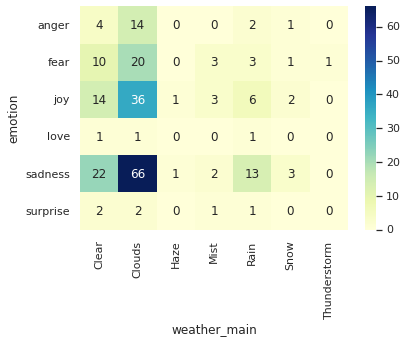

In [273]:
sns.heatmap(table, annot=True, cmap="YlGnBu")

In [281]:
table

weather_main,Clear,Clouds,Haze,Mist,Rain,Snow,Thunderstorm
emotion,,,,,,,
anger,4,14,0,0,2,1,0
fear,10,20,0,3,3,1,1
joy,14,36,1,3,6,2,0
love,1,1,0,0,1,0,0
sadness,22,66,1,2,13,3,0
surprise,2,2,0,1,1,0,0


In [681]:
table = pd.crosstab(analysis_df["sentiment"], analysis_df["weather_main"])
table

weather_main,Clear,Clouds,Haze,Mist,Rain,Snow,Thunderstorm
sentiment,,,,,,,
NEGATIVE,43,108,0,8,21,5,1
POSITIVE,10,31,2,1,5,2,0


<AxesSubplot:xlabel='weather_main', ylabel='sentiment'>

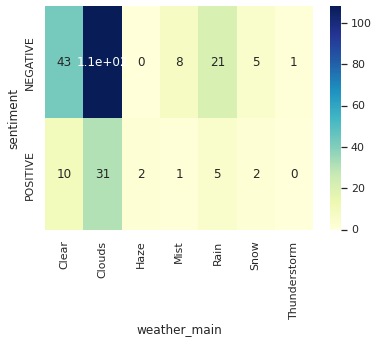

In [682]:
sns.heatmap(table, annot=True, cmap="YlGnBu")

In [688]:
chisquared_test(table, prob=0.8)

weather_main  Clear  Clouds  Haze  Mist  Rain  Snow  Thunderstorm
sentiment                                                        
NEGATIVE         43     108     0     8    21     5             1
POSITIVE         10      31     2     1     5     2             0
dof=6
[[ 41.59493671 109.08860759   1.56962025   7.06329114  20.40506329
    5.49367089   0.78481013]
 [ 11.40506329  29.91139241   0.43037975   1.93670886   5.59493671
    1.50632911   0.21518987]]
probability=0.800, critical=8.558, stat=8.703
Dependent (reject H0)
significance=0.200, p=0.191
Dependent (reject H0)


In [289]:
table = pd.crosstab(analysis_df["sentiment"], analysis_df["emotion"])
table

emotion,anger,fear,joy,love,sadness,surprise
sentiment,,,,,,
NEGATIVE,17,37,36,1,94,3
POSITIVE,4,3,29,2,14,3


<AxesSubplot:xlabel='emotion', ylabel='sentiment'>

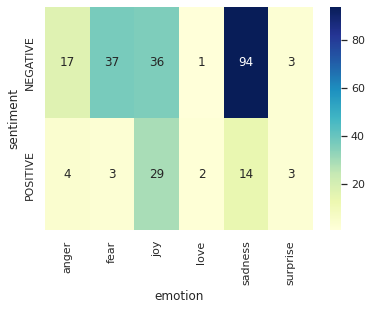

In [290]:
sns.heatmap(table, annot=True, cmap="YlGnBu")

In [291]:
chisquared_test(table)

emotion    anger  fear  joy  love  sadness  surprise
sentiment                                           
NEGATIVE      17    37   36     1       94         3
POSITIVE       4     3   29     2       14         3
dof=5
[[16.24691358 30.94650206 50.28806584  2.32098765 83.55555556  4.64197531]
 [ 4.75308642  9.05349794 14.71193416  0.67901235 24.44444444  1.35802469]]
probability=0.950, critical=11.070, stat=34.978
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [296]:
table

emotion,anger,fear,joy,love,sadness,surprise
sentiment,,,,,,
NEGATIVE,17,37,36,1,94,3
POSITIVE,4,3,29,2,14,3


In [318]:
analysis_df.loc[analysis_df["clouds_all"] < 50, "sentiment"].value_counts()

NEGATIVE    101
POSITIVE     24
Name: sentiment, dtype: int64

In [319]:
analysis_df.loc[analysis_df["clouds_all"] < 30, "sentiment"].value_counts()

NEGATIVE    68
POSITIVE    14
Name: sentiment, dtype: int64

In [374]:
analysis_df["cloudy"] = analysis_df["clouds_all"] < 50

In [375]:
analysis_df["cover"] = analysis_df.apply(lambda r: "cloudy" if r.cloudy else "clear", axis=1) 

In [376]:
analysis_df["cover"].value_counts()

cloudy    125
clear     118
Name: cover, dtype: int64

In [377]:
analysis_df.loc[(analysis_df["cover"] == "cloudy"), "sentiment"].value_counts()

NEGATIVE    101
POSITIVE     24
Name: sentiment, dtype: int64

In [378]:
analysis_df.loc[(analysis_df["cover"] == "clear"), "sentiment"].value_counts()

NEGATIVE    87
POSITIVE    31
Name: sentiment, dtype: int64

In [379]:
analysis_df.loc[(analysis_df["cover"] == "cloudy"), "emotion"].value_counts()

sadness     59
joy         30
fear        23
anger        9
surprise     3
love         1
Name: emotion, dtype: int64

In [381]:
analysis_df.loc[(analysis_df["cover"] == "clear"), "emotion"].value_counts()

sadness     49
joy         35
fear        17
anger       12
surprise     3
love         2
Name: emotion, dtype: int64

In [380]:
table = pd.crosstab(analysis_df["cover"], analysis_df["sentiment"])
table

sentiment,NEGATIVE,POSITIVE
cover,,
clear,87,31
cloudy,101,24


<AxesSubplot:xlabel='sentiment', ylabel='cover'>

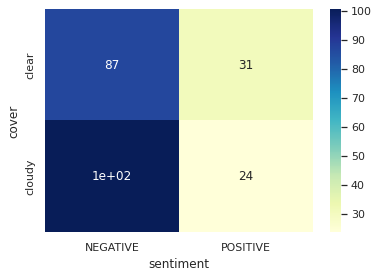

In [355]:
sns.heatmap(table, annot=True, cmap="YlGnBu")

In [357]:
table = pd.crosstab(analysis_df["weather_main"], analysis_df["emotion"])
table

emotion,anger,fear,joy,love,sadness,surprise
weather_main,,,,,,
Clear,4,10,14,1,22,2
Clouds,14,20,36,1,66,2
Haze,0,0,1,0,1,0
Mist,0,3,3,0,2,1
Rain,2,3,6,1,13,1
Snow,1,1,2,0,3,0
Thunderstorm,0,1,0,0,0,0


<AxesSubplot:xlabel='emotion', ylabel='weather_main'>

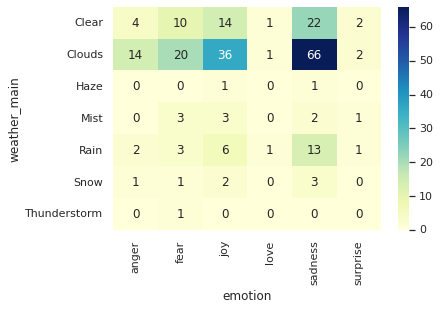

In [358]:
sns.heatmap(table, annot=True, cmap="YlGnBu")

In [361]:
table = pd.crosstab(analysis_df["cover"], analysis_df["sentiment"])
table

sentiment,NEGATIVE,POSITIVE
cover,,
clear,87,31
cloudy,101,24


<AxesSubplot:xlabel='sentiment', ylabel='cover'>

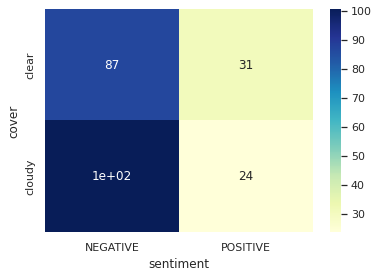

In [362]:
sns.heatmap(table, annot=True, cmap="YlGnBu")

In [387]:
sf_df = analysis_df.loc[analysis_df["city_name"] == "San Francisco"]
sf_df

,emotion,sentiment,context,date,city_name,weather_main,clouds_all,weather_description,cover,cloudy,temp
6,anger,NEGATIVE,"[joyful, trusting]",2018-09-03 04:55:19,San Francisco,Clouds,55.0,broken clouds,clear,False,14.07
7,sadness,NEGATIVE,"[afraid, confident, prepared]",2018-08-05 17:07:17,San Francisco,Clouds,18.0,few clouds,cloudy,True,15.32
17,sadness,NEGATIVE,"[anticipating, apprehensive]",2018-11-27 19:46:56,San Francisco,Rain,100.0,moderate rain,clear,False,15.27
21,joy,NEGATIVE,"[furious, sad]",2018-08-06 17:22:51,San Francisco,Clouds,16.0,few clouds,cloudy,True,17.45
24,sadness,NEGATIVE,"[proud, sentimental]",2018-07-31 05:12:21,San Francisco,Clouds,36.0,scattered clouds,cloudy,True,14.19
25,sadness,NEGATIVE,"[proud, sad]",2018-07-29 17:06:30,San Francisco,Clouds,68.0,broken clouds,clear,False,13.89
26,joy,NEGATIVE,"[guilty, sad]",2018-06-26 20:06:49,San Francisco,Clear,2.0,sky is clear,cloudy,True,16.48
27,sadness,NEGATIVE,"[afraid, disappointed]",2018-08-01 21:27:11,San Francisco,Clouds,40.0,scattered clouds,cloudy,True,16.72
37,fear,NEGATIVE,"[annoyed, disgusted]",2018-07-09 03:13:29,San Francisco,Clear,1.0,sky is clear,cloudy,True,16.02
38,joy,POSITIVE,"[ashamed, excited, grateful, surprised]",2018-08-24 07:12:04,San Francisco,Clouds,38.0,scattered clouds,cloudy,True,14.47


In [391]:
sf_df.head()

,emotion,sentiment,context,date,city_name,weather_main,clouds_all,weather_description,cover,cloudy,temp
6,anger,NEGATIVE,"[joyful, trusting]",2018-09-03 04:55:19,San Francisco,Clouds,55.0,broken clouds,clear,False,14.07
7,sadness,NEGATIVE,"[afraid, confident, prepared]",2018-08-05 17:07:17,San Francisco,Clouds,18.0,few clouds,cloudy,True,15.32
17,sadness,NEGATIVE,"[anticipating, apprehensive]",2018-11-27 19:46:56,San Francisco,Rain,100.0,moderate rain,clear,False,15.27
21,joy,NEGATIVE,"[furious, sad]",2018-08-06 17:22:51,San Francisco,Clouds,16.0,few clouds,cloudy,True,17.45
24,sadness,NEGATIVE,"[proud, sentimental]",2018-07-31 05:12:21,San Francisco,Clouds,36.0,scattered clouds,cloudy,True,14.19


In [394]:
sf_df["sentiment"].value_counts()

NEGATIVE    37
POSITIVE     5
Name: sentiment, dtype: int64

In [396]:
analysis_df.loc[analysis_df["city_name"] == "Chicago", "sentiment"].value_counts()

NEGATIVE    117
POSITIVE     40
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='date'>

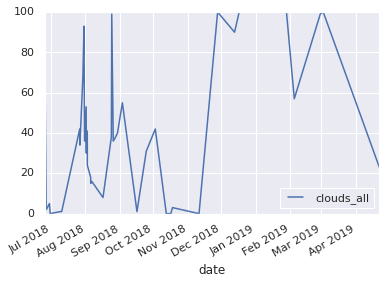

In [411]:
analysis_df.loc[analysis_df["city_name"] == "San Francisco"].plot(x="date", y="clouds_all", kind="line")

In [416]:
analysis_df["date"]

0     2014-06-19 12:02:55
1     2013-01-03 04:00:56
2     2014-07-23 22:05:00
3     2012-12-14 04:47:36
4     2013-07-09 13:14:23
              ...        
238   2018-07-17 03:02:11
239   2012-09-02 03:30:39
240   2012-12-15 07:06:18
241   2013-06-22 14:16:33
242   2013-09-14 19:01:04
Name: date, Length: 243, dtype: datetime64[ns]

array([<AxesSubplot:title={'center':'NEGATIVE'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'POSITIVE'}, ylabel='Frequency'>],
      dtype=object)

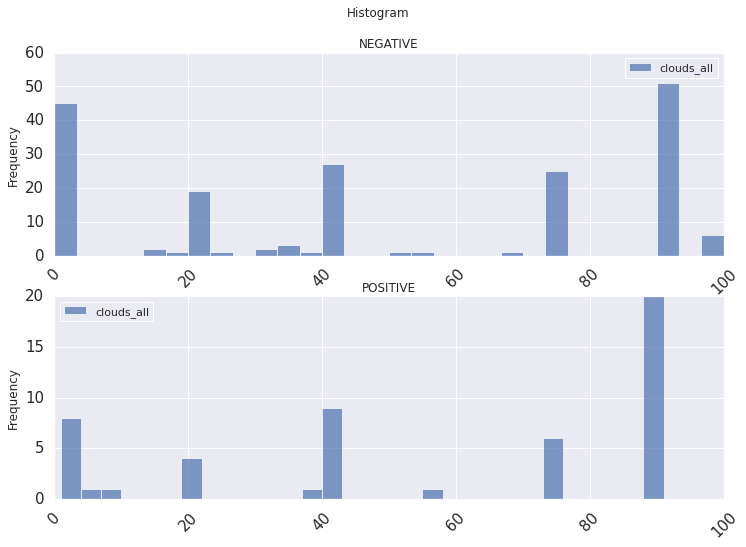

In [425]:
analysis_df.plot.hist(
    column=["clouds_all"],
    by="sentiment",
    alpha=0.7,
    bins=30,
    title='Histogram',
    rot=45,
    grid=True,
    figsize=(12,8),
    fontsize=15, 
    color=['#A0E8AF', '#FFCF56'])

array([<AxesSubplot:title={'center':'NEGATIVE'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'POSITIVE'}, ylabel='Frequency'>],
      dtype=object)

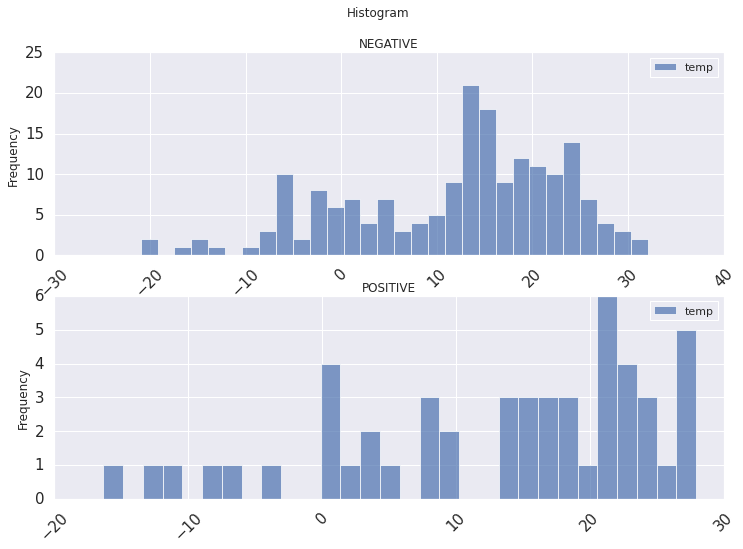

In [426]:
analysis_df.plot.hist(
    column=["temp"],
    by="sentiment",
    alpha=0.7,
    bins=30,
    title='Histogram',
    rot=45,
    grid=True,
    figsize=(12,8),
    fontsize=15, 
    color=['#A0E8AF', '#FFCF56'])

array([<AxesSubplot:title={'center':'anger'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'fear'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'joy'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'love'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'sadness'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'surprise'}, ylabel='Frequency'>],
      dtype=object)

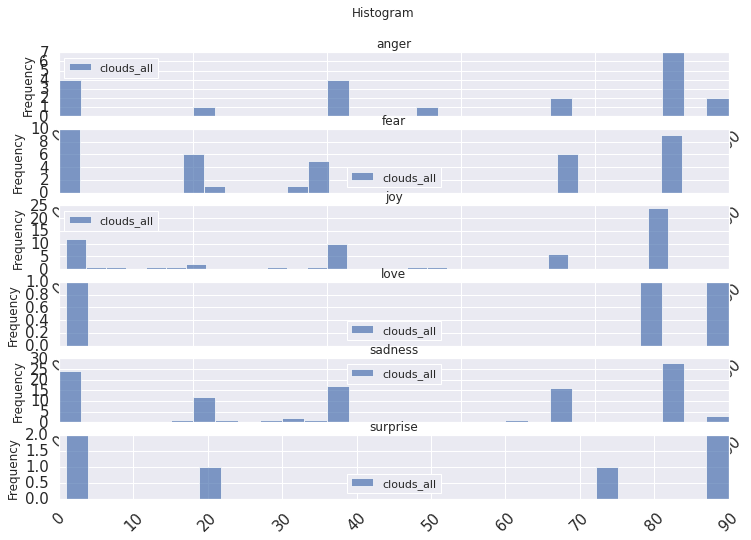

In [428]:
analysis_df.plot.hist(
    column=["clouds_all"],
    by="emotion",
    alpha=0.7,
    bins=30,
    title='Histogram',
    rot=45,
    grid=True,
    figsize=(12,8),
    fontsize=15, 
    color=['#A0E8AF', '#FFCF56'])

In [443]:
analysis_df["sentiment"].value_counts()

NEGATIVE    188
POSITIVE     55
Name: sentiment, dtype: int64

In [449]:
negative_df = analysis_df.loc[analysis_df["sentiment"] == "NEGATIVE"].sample(50)

In [448]:
positive_df = analysis_df.loc[analysis_df["sentiment"] == "POSITIVE"].sample(50)

In [452]:
subset_df = pd.concat([negative_df, positive_df], axis=0)

In [464]:
subset_df["cover"].value_counts()

clear     53
cloudy    47
Name: cover, dtype: int64

In [466]:
pd.crosstab(subset_df["cover"], subset_df["sentiment"])

sentiment,NEGATIVE,POSITIVE
cover,,
clear,25,28
cloudy,25,22


In [482]:
pos_df = analysis_df.loc[(analysis_df["sentiment"] == "POSITIVE")]
pos_df.shape

(55, 12)

In [493]:
neg_df = analysis_df.loc[(analysis_df["sentiment"] == "NEGATIVE")].sample(pos_df.shape[0])
neg_df

,emotion,sentiment,context,date,city_name,weather_main,clouds_all,weather_description,cover,cloudy,temp,top_context
129,sadness,NEGATIVE,"[confident, sad]",2018-08-02 17:11:28,San Francisco,Clouds,24.0,few clouds,cloudy,True,14.61,confident
210,fear,NEGATIVE,"[confident, sentimental]",2014-12-31 16:00:58,Champaign,Clear,1.0,sky is clear,cloudy,True,-8.16,confident
21,joy,NEGATIVE,"[furious, sad]",2018-08-06 17:22:51,San Francisco,Clouds,16.0,few clouds,cloudy,True,17.45,furious
17,sadness,NEGATIVE,"[anticipating, apprehensive]",2018-11-27 19:46:56,San Francisco,Rain,100.0,moderate rain,clear,False,15.27,anticipating
75,anger,NEGATIVE,"[afraid, anxious]",2014-08-14 04:42:47,Champaign,Clouds,40.0,scattered clouds,cloudy,True,17.66,afraid
197,joy,NEGATIVE,"[apprehensive, guilty]",2014-07-02 03:49:22,Chicago,Clouds,40.0,scattered clouds,cloudy,True,21.00,apprehensive
45,joy,NEGATIVE,"[devastated, disgusted]",2013-09-12 02:54:30,Chicago,Clouds,90.0,overcast clouds,clear,False,24.74,devastated
32,sadness,NEGATIVE,"[anxious, nostalgic]",2013-03-03 17:39:08,Chicago,Clouds,20.0,few clouds,cloudy,True,0.03,anxious
109,sadness,NEGATIVE,"[confident, devastated]",2018-10-12 16:57:27,San Francisco,Clear,0.0,sky is clear,cloudy,True,17.73,confident
40,sadness,NEGATIVE,"[anxious, excited, sentimental, surprised]",2014-12-10 01:01:21,Champaign,Clouds,90.0,overcast clouds,clear,False,1.99,anxious


In [536]:
pn_df = pd.concat([pos_df, neg_df], axis=0)
pn_df

,emotion,sentiment,context,date,city_name,weather_main,clouds_all,weather_description,cover,cloudy,temp,top_context
2,sadness,POSITIVE,"[anticipating, grateful]",2014-07-23 22:05:00,Chicago,Clouds,20.0,few clouds,cloudy,True,19.01,anticipating
3,joy,POSITIVE,"[grateful, sad]",2012-12-14 04:47:36,Chicago,Clouds,90.0,overcast clouds,clear,False,3.18,grateful
4,sadness,POSITIVE,"[confident, excited]",2013-07-09 13:14:23,Chicago,Clouds,75.0,broken clouds,clear,False,27.93,confident
11,surprise,POSITIVE,"[anticipating, caring]",2014-05-25 15:44:31,Chicago,Clouds,20.0,few clouds,cloudy,True,24.22,anticipating
14,anger,POSITIVE,"[jealous, trusting]",2021-08-07 21:09:47,Chicago,Rain,90.0,light rain,clear,False,27.71,jealous
...,...,...,...,...,...,...,...,...,...,...,...,...
185,joy,NEGATIVE,"[anxious, terrified]",2015-10-01 04:06:08,Champaign,Clear,1.0,sky is clear,cloudy,True,11.52,anxious
27,sadness,NEGATIVE,"[afraid, disappointed]",2018-08-01 21:27:11,San Francisco,Clouds,40.0,scattered clouds,cloudy,True,16.72,afraid
69,joy,NEGATIVE,"[anxious, sentimental]",2018-08-01 15:23:08,San Francisco,Clouds,53.0,broken clouds,clear,False,13.31,anxious
242,sadness,NEGATIVE,"[guilty, sad]",2013-09-14 19:01:04,Chicago,Clouds,75.0,broken clouds,clear,False,19.87,guilty


In [537]:
pn_df["cover"].value_counts()

clear     59
cloudy    51
Name: cover, dtype: int64

In [541]:
table = pd.crosstab(analysis_df["sentiment"], analysis_df["cover"])

In [542]:
table

cover,clear,cloudy
sentiment,,
NEGATIVE,87,101
POSITIVE,31,24


In [543]:
chisquared_test(table)

cover      clear  cloudy
sentiment               
NEGATIVE      87     101
POSITIVE      31      24
dof=1
[[91.29218107 96.70781893]
 [26.70781893 28.29218107]]
probability=0.950, critical=3.841, stat=1.353
Independent (fail to reject H0)
significance=0.050, p=0.245
Independent (fail to reject H0)


In [522]:
analysis_df.head()

,emotion,sentiment,context,date,city_name,weather_main,clouds_all,weather_description,cover,cloudy,temp,top_context
0,surprise,NEGATIVE,"[ashamed, sentimental]",2014-06-19 12:02:55,Chicago,Mist,90.0,mist,clear,False,15.71,ashamed
1,fear,NEGATIVE,"[apprehensive, sad]",2013-01-03 04:00:56,Chicago,Clouds,40.0,scattered clouds,cloudy,True,-6.82,apprehensive
2,sadness,POSITIVE,"[anticipating, grateful]",2014-07-23 22:05:00,Chicago,Clouds,20.0,few clouds,cloudy,True,19.01,anticipating
3,joy,POSITIVE,"[grateful, sad]",2012-12-14 04:47:36,Chicago,Clouds,90.0,overcast clouds,clear,False,3.18,grateful
4,sadness,POSITIVE,"[confident, excited]",2013-07-09 13:14:23,Chicago,Clouds,75.0,broken clouds,clear,False,27.93,confident


In [596]:
table = pd.crosstab(analysis_df["emotion"], analysis_df["sentiment"])
table

sentiment,NEGATIVE,POSITIVE
emotion,,
anger,17,4
fear,37,3
joy,36,29
love,1,2
sadness,94,14
surprise,3,3


In [581]:
chisquared_test(table)

sentiment  NEGATIVE  POSITIVE
emotion                      
anger            17         4
fear             37         3
joy              36        29
love              1         2
sadness          94        14
surprise          3         3
dof=5
[[16.24691358  4.75308642]
 [30.94650206  9.05349794]
 [50.28806584 14.71193416]
 [ 2.32098765  0.67901235]
 [83.55555556 24.44444444]
 [ 4.64197531  1.35802469]]
probability=0.950, critical=11.070, stat=34.978
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


In [582]:
table.iloc[0].idxmax()

'NEGATIVE'

In [597]:
table["gen_sentiment"] = table.apply(lambda r: r.idxmax(), axis=1)

In [598]:
table

sentiment,NEGATIVE,POSITIVE,gen_sentiment
emotion,,,
anger,17,4,NEGATIVE
fear,37,3,NEGATIVE
joy,36,29,NEGATIVE
love,1,2,POSITIVE
sadness,94,14,NEGATIVE
surprise,3,3,NEGATIVE


In [599]:
table.keys()

Index(['NEGATIVE', 'POSITIVE', 'gen_sentiment'], dtype='object', name='sentiment')

In [604]:
for r in table.iterrows():
    print(r)

('anger', sentiment
NEGATIVE               17
POSITIVE                4
gen_sentiment    NEGATIVE
Name: anger, dtype: object)
('fear', sentiment
NEGATIVE               37
POSITIVE                3
gen_sentiment    NEGATIVE
Name: fear, dtype: object)
('joy', sentiment
NEGATIVE               36
POSITIVE               29
gen_sentiment    NEGATIVE
Name: joy, dtype: object)
('love', sentiment
NEGATIVE                1
POSITIVE                2
gen_sentiment    POSITIVE
Name: love, dtype: object)
('sadness', sentiment
NEGATIVE               94
POSITIVE               14
gen_sentiment    NEGATIVE
Name: sadness, dtype: object)
('surprise', sentiment
NEGATIVE                3
POSITIVE                3
gen_sentiment    NEGATIVE
Name: surprise, dtype: object)


In [623]:
mood_map = dict([(table.iloc[i].name, table.iloc[i].gen_sentiment) for i in range(table.shape[0])])
mood_map["joy"] = "POSITIVE"

In [624]:
mood_map

{'anger': 'NEGATIVE',
 'fear': 'NEGATIVE',
 'joy': 'POSITIVE',
 'love': 'POSITIVE',
 'sadness': 'NEGATIVE',
 'surprise': 'NEGATIVE'}

In [626]:
analysis_df["mood"] = analysis_df.apply(lambda r: mood_map[r.emotion], axis=1)

In [627]:
analysis_df

,emotion,sentiment,context,date,city_name,weather_main,clouds_all,weather_description,cover,cloudy,temp,top_context,mood
0,surprise,NEGATIVE,"[ashamed, sentimental]",2014-06-19 12:02:55,Chicago,Mist,90.0,mist,clear,False,15.71,ashamed,NEGATIVE
1,fear,NEGATIVE,"[apprehensive, sad]",2013-01-03 04:00:56,Chicago,Clouds,40.0,scattered clouds,cloudy,True,-6.82,apprehensive,NEGATIVE
2,sadness,POSITIVE,"[anticipating, grateful]",2014-07-23 22:05:00,Chicago,Clouds,20.0,few clouds,cloudy,True,19.01,anticipating,NEGATIVE
3,joy,POSITIVE,"[grateful, sad]",2012-12-14 04:47:36,Chicago,Clouds,90.0,overcast clouds,clear,False,3.18,grateful,POSITIVE
4,sadness,POSITIVE,"[confident, excited]",2013-07-09 13:14:23,Chicago,Clouds,75.0,broken clouds,clear,False,27.93,confident,NEGATIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,fear,POSITIVE,"[confident, sentimental]",2018-07-17 03:02:11,Boston,None,NaN,None,clear,False,NaN,confident,NEGATIVE
239,joy,NEGATIVE,"[annoyed, sad]",2012-09-02 03:30:39,Chicago,Rain,90.0,light rain,clear,False,23.48,annoyed,POSITIVE
240,joy,NEGATIVE,"[anxious, sentimental]",2012-12-15 07:06:18,Chicago,Clouds,90.0,overcast clouds,clear,False,5.83,anxious,POSITIVE
241,sadness,NEGATIVE,"[apprehensive, terrified]",2013-06-22 14:16:33,Chicago,Clouds,90.0,overcast clouds,clear,False,25.03,apprehensive,NEGATIVE


In [546]:
analysis_df.head()

,emotion,sentiment,context,date,city_name,weather_main,clouds_all,weather_description,cover,cloudy,temp,top_context
0,surprise,NEGATIVE,"[ashamed, sentimental]",2014-06-19 12:02:55,Chicago,Mist,90.0,mist,clear,False,15.71,ashamed
1,fear,NEGATIVE,"[apprehensive, sad]",2013-01-03 04:00:56,Chicago,Clouds,40.0,scattered clouds,cloudy,True,-6.82,apprehensive
2,sadness,POSITIVE,"[anticipating, grateful]",2014-07-23 22:05:00,Chicago,Clouds,20.0,few clouds,cloudy,True,19.01,anticipating
3,joy,POSITIVE,"[grateful, sad]",2012-12-14 04:47:36,Chicago,Clouds,90.0,overcast clouds,clear,False,3.18,grateful
4,sadness,POSITIVE,"[confident, excited]",2013-07-09 13:14:23,Chicago,Clouds,75.0,broken clouds,clear,False,27.93,confident


In [628]:
analysis_df["mood"].value_counts()

NEGATIVE    175
POSITIVE     68
Name: mood, dtype: int64

In [740]:
mood_table = pd.crosstab(analysis_df["sentiment"], analysis_df["cover"])

In [741]:
mood_table

cover,clear,cloudy
sentiment,,
NEGATIVE,87,101
POSITIVE,31,24


<AxesSubplot:xlabel='cover', ylabel='sentiment'>

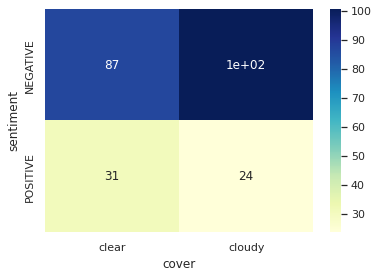

In [742]:
sns.heatmap(mood_table, annot=True, cmap="YlGnBu")

In [743]:
chisquared_test(mood_table, prob=0.75)

cover      clear  cloudy
sentiment               
NEGATIVE      87     101
POSITIVE      31      24
dof=1
[[91.29218107 96.70781893]
 [26.70781893 28.29218107]]
probability=0.750, critical=1.323, stat=1.353
Dependent (reject H0)
significance=0.250, p=0.245
Dependent (reject H0)


In [746]:
mood_table.apply(lambda r: r.idxmax(), axis=1)

sentiment
NEGATIVE    cloudy
POSITIVE     clear
dtype: object

cover,clear,cloudy
sentiment,,
NEGATIVE,87,101
POSITIVE,31,24
